# Critical Factors in Hospital Satifaction Surveys

The HCAHPS (the Hospital Consumer Assessment of Healthcare Providers and Systems) is a patient satisfaction 
survey required by CMS (the Centers for Medicare and Medicaid Services) for all hospitals in the United States.

This paper will explore the survey data of the HCAHPS to identify actionable trends for hostpials to focus upon.
The HCAHAPS breaks down survey questions into 9 service categories:
    
    1. Communication with doctors
    2. Communication with nurses
    3. Responsiveness of hospital staff
    4. Pain management
    5. Communication about medicines
    6. Discharge information
    7. Cleanliness of the hospital environment
    8. Quietness of the hospital environment
    9. Transition of care
    
The HCAHPS survey establishes a linear mean value score for each of the 9 service categories for each hospital.
It also establishes linear mean scores on overall hospital raiting and hospital recommendation.
    
The HCAHPS includes a question regarding whether patients would reccommend the hospital to family or friends.
The results include a positive 'YES' percentage, a nagative 'NO' percentage and a neutral percentage.  This
study will create linear regressions to evaluate correlations between the various survey questions and the 
likelihood of recommendation.  It will answer the following questions:
    
    1. How do the linear mean value scores of the 9 service categories correlate to the likelihood of receiving 
    a 'NO' recommendation response?
    
    2. How do the individual survey questions correlae to the likelihood of receiving a 'NO' on the 
    recommendtion response?
    
    3. ?


In [53]:
import pandas as pd
df = pd.read_csv('Patient_survey__HCAHPS__-_Hospital.csv')
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [54]:
# Browse Data

df.head(12)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date,Location
0,241343,MUNICIPAL HOSPITAL AND GRANITE MANOR,345 TENTH AVENUE,GRANITE FALLS,MN,56241,YELLOW MEDICINE,3205643111,H_COMP_5_STAR_RATING,Communication about medicines - star rating,...,Not Applicable,NaN,Not Applicable,103,NaN,40,NaN,10/01/2015,09/30/2016,"345 TENTH AVENUE\nGRANITE FALLS, MN\n(44.80873..."
1,241338,MAYO CLINIC HEALTH SYSTEM - LAKE CITY,500 WEST GRANT STREET,LAKE CITY,MN,55041,WABASHA,6513455955,H_COMP_3_SN_P,"Patients who reported that they ""Sometimes"" or...",...,1,NaN,Not Applicable,105,NaN,43,NaN,10/01/2015,09/30/2016,"500 WEST GRANT STREET\nLAKE CITY, MN\n(44.4583..."
2,241339,HENDRICKS COMMUNITY HOSPITAL,503 E LINCOLN STREET,HENDRICKS,MN,56136,LINCOLN,5072753134,H_QUIET_STAR_RATING,Quietness - star rating,...,Not Applicable,NaN,Not Applicable,Not Available,5 - Results are not available for this reporti...,Not Available,5 - Results are not available for this reporti...,10/01/2015,09/30/2016,"503 E LINCOLN STREET\nHENDRICKS, MN\n(44.50629..."
3,241338,MAYO CLINIC HEALTH SYSTEM - LAKE CITY,500 WEST GRANT STREET,LAKE CITY,MN,55041,WABASHA,6513455955,H_QUIET_LINEAR_SCORE,Quietness - linear mean score,...,Not Applicable,NaN,82,105,NaN,43,NaN,10/01/2015,09/30/2016,"500 WEST GRANT STREET\nLAKE CITY, MN\n(44.4583..."
4,241342,ORTONVILLE AREA HEALTH SERVICES,450 EASTVOLD AVE,ORTONVILLE,MN,56278,BIG STONE,3208392502,H_COMP_2_LINEAR_SCORE,Doctor communication - linear mean score,...,Not Applicable,NaN,Not Available,98,6 - Fewer than 100 patients completed the HCAH...,40,6 - Fewer than 100 patients completed the HCAH...,10/01/2015,09/30/2016,"450 EASTVOLD AVE\nORTONVILLE, MN\n(45.314768, ..."
5,241337,NORTH VALLEY HEALTH CENTER,300 WEST GOOD SAMARITAN DRIVE,WARREN,MN,56762,MARSHALL,2187454211,H_RECMND_STAR_RATING,Recommend hospital - star rating,...,Not Applicable,NaN,Not Applicable,Not Available,5 - Results are not available for this reporti...,Not Available,5 - Results are not available for this reporti...,10/01/2015,09/30/2016,"300 WEST GOOD SAMARITAN DRIVE\nWARREN, MN\n(48..."
6,241341,APPLETON MUNICIPAL HOSPITAL,30 SOUTH BEHL STREET,APPLETON,MN,56208,SWIFT,3202898508,H_COMP_3_A_P,"Patients who reported that they ""Always"" recei...",...,Not Available,1 - The number of cases/patients is too few to...,Not Applicable,Not Available,1 - The number of cases/patients is too few to...,Not Available,1 - The number of cases/patients is too few to...,10/01/2015,09/30/2016,"30 SOUTH BEHL STREET\nAPPLETON, MN\n(45.199658..."
7,241338,MAYO CLINIC HEALTH SYSTEM - LAKE CITY,500 WEST GRANT STREET,LAKE CITY,MN,55041,WABASHA,6513455955,H_COMP_6_Y_P,"Patients who reported that YES, they were give...",...,91,NaN,Not Applicable,105,NaN,43,NaN,10/01/2015,09/30/2016,"500 WEST GRANT STREET\nLAKE CITY, MN\n(44.4583..."
8,241339,HENDRICKS COMMUNITY HOSPITAL,503 E LINCOLN STREET,HENDRICKS,MN,56136,LINCOLN,5072753134,H_COMP_2_LINEAR_SCORE,Doctor communication - linear mean score,...,Not Applicable,NaN,Not Available,Not Available,5 - Results are not available for this reporti...,Not Available,5 - Results are not available for this reporti...,10/01/2015,09/30/2016,"503 E LINCOLN STREET\nHENDRICKS, MN\n(44.50629..."
9,241337,NORTH VALLEY HEALTH CENTER,300 WEST GOOD SAMARITAN DRIVE,WARREN,MN,56762,MARSHALL,2187454211,H_QUIET_HSP_A_P,Patients who reported that the area around the...,...,Not Available,5 - Results are not available for this reporti...,Not Applicable,Not Available,5 - Results are not available for this reporti...,Not Available,5 - Results are not available for this reporti...,10/01/2015,09/30/2016,"300 WEST GOOD SAMARITAN DRIVE\nWARREN, MN\n(48..."


In [55]:
# Data is stored as a series of objects.  
# Column names include blank spaces.  Will replace blank spaces in colun names with a '_'

df.columns = df.columns.str.replace('\s+', '_')

# Clean problematic characters from question column

df['HCAHPS_Question'] = df['HCAHPS_Question'].str.replace('"','')
df['HCAHPS_Question'] = df['HCAHPS_Question'].str.replace("'","")
df['HCAHPS_Question'] = df['HCAHPS_Question'].str.replace('\x93','')
df['HCAHPS_Question'] = df['HCAHPS_Question'].str.replace('\x94','')


# Set default plot font size

plt.rcParams.update({'font.size': 15})

In [56]:
# Creating new dataframe 'yes_rec_df' which corresponds solely to the question of whether patients
# would recommend hospital to friends and family.  The 'HCAHPS_Answer_Percent' columns within this 
# dataframe represent the percentage of respondents who said they would recommend hospital.

yes_rec_df = df[df.HCAHPS_Question == 'Patients who reported YES, they would definitely recommend the hospital']

In [57]:
# Many of the HCAHPS_Aswer_Percent fields contain a a value 'Not Available'.  Those entries
# are removed since they are not relevant and cannot be plotted.

yes_rec_df = yes_rec_df[yes_rec_df.HCAHPS_Answer_Percent != 'Not Available']
#len(yes_rec_df)

# len shows we have 4103 records in our list of hospitals with valid percentages to recommend quetion.

In [58]:
# In order to plot histogram of how how hopitals perforomed on recommend question, data 
# is isoltated on percentage variable and converted from object to integer.


rec_percent = yes_rec_df.HCAHPS_Answer_Percent
yes_int = rec_percent.astype(int)

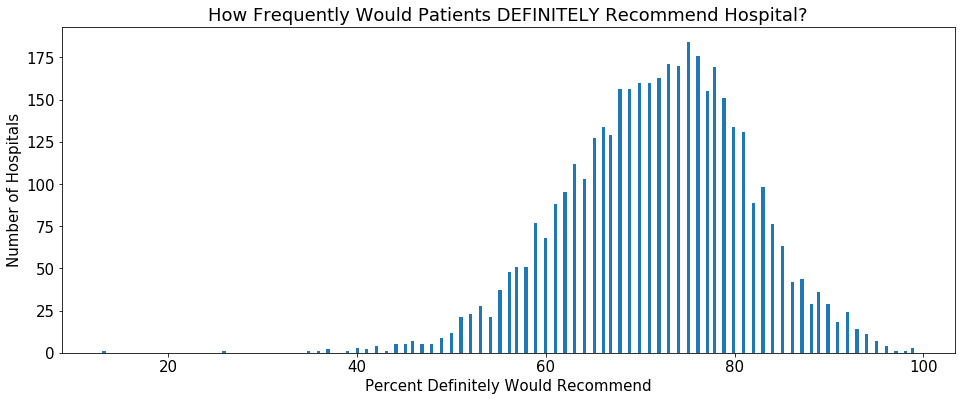

In [59]:
# Histogram showing spread of how likely patients are to recommend hospital to family and friends

plt.figure(figsize=(16, 6))
plt.hist(yes_int, bins = 250)
plt.xlabel('Percent Definitely Would Recommend')
plt.ylabel('Number of Hospitals')
plt.title('How Frequently Would Patients DEFINITELY Recommend Hospital?')
plt.show()

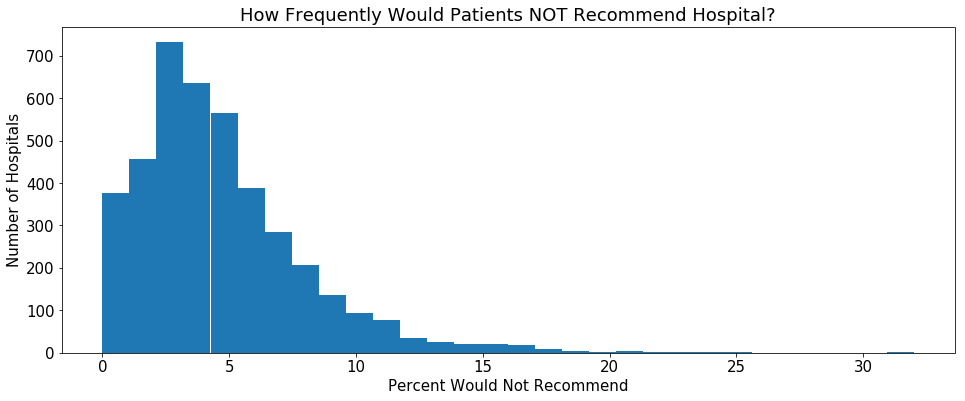

In [60]:
# Doing same thing with 'would not recommend' answers

no_rec_df = df[df.HCAHPS_Question == 'Patients who reported NO, they would probably not or definitely not recommend the hospital']
no_rec_df = no_rec_df[no_rec_df.HCAHPS_Answer_Percent != 'Not Available']
#len(no_rec_df)

# 4103 hospitals contain 'no' percentage data, same as with 'yes' data from above

# Generate histogram showing percent of patients who would not recommend hospital

no_rec_percent = no_rec_df.HCAHPS_Answer_Percent
no_int = no_rec_percent.astype(int)

plt.figure(figsize=(16, 6))
plt.hist(no_int, bins = 30)
plt.xlabel('Percent Would Not Recommend')
plt.ylabel('Number of Hospitals')
plt.title('How Frequently Would Patients NOT Recommend Hospital?')
plt.show()

In [61]:
# Function will plot histogram and least squared regression for a given question's value, and add r-squared
# values to lists


r2_questions = []
r2_values = []


def plot_histogram_and_regression(question):
  question_frame = df[df.HCAHPS_Question == question]

  # remove bad fields
  question_frame = question_frame[question_frame.HCAHPS_Linear_Mean_Value != 'Not Available']
  question_frame = question_frame[question_frame.HCAHPS_Linear_Mean_Value != 'Not Applicable']
    
  # generate ineteger values
  answer_value = question_frame.HCAHPS_Linear_Mean_Value
  answer_value_int = answer_value.astype(int)

  # plot histogram  
  plt.figure(figsize=(20, 5))
  plt.suptitle(question)
  plt.subplot(1,2,1)
  plt.hist(answer_value_int, bins = 20)
  plt.xlabel('Linear Mean Score')
  plt.ylabel('Number of Hospitals')
  plt.title('Histogram')

  # Regression

  # merge questions and 'NO' reponses
  question_and_no_pd = pd.merge(question_frame, no_rec_df, on='Provider_ID')
  x_linear_value = question_and_no_pd.HCAHPS_Linear_Mean_Value_x
  x_linear_value_int = x_linear_value.astype(int)
  y_no_recommend = question_and_no_pd.HCAHPS_Answer_Percent_y
  y_no_recommend_int = y_no_recommend.astype(int)

  # create regression variables
  slope, intercept, r_value, p_value, std_err = stats.linregress(x_linear_value_int, y_no_recommend_int)

  # plot regression
  plt.subplot(1,2,2)
  plt.scatter(x = x_linear_value_int, y = y_no_recommend_int, label = question)
  plt.plot(x_linear_value_int, intercept + slope*x_linear_value_int, 'r', label='Least Squares Fitted Line')
  plt.xlabel('Linear Value')
  plt.ylabel('Percent Would Not Recommend - NO')
  plt.xticks([60, 70, 80, 90, 100])
  plt.title('Regression vs NO Recommend')
  #plt.legend()
  plt.show()

  print('slope:', slope, 'intercept:', intercept, 'r_value:', r_value, 'p_value:', p_value, 'std_err:', std_err, 'r-squared:', r_value**2)
  r2_questions.append(question)
  r2_values.append(r_value**2)
  

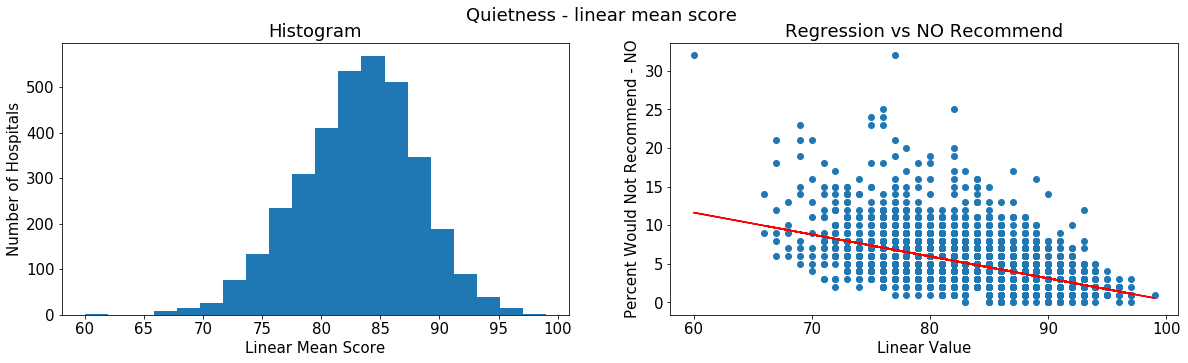

slope: -0.284109397139 intercept: 28.6846756514 r_value: -0.461166217724 p_value: 3.80078738856e-184 std_err: 0.00923602847852 r-squared: 0.21267428037


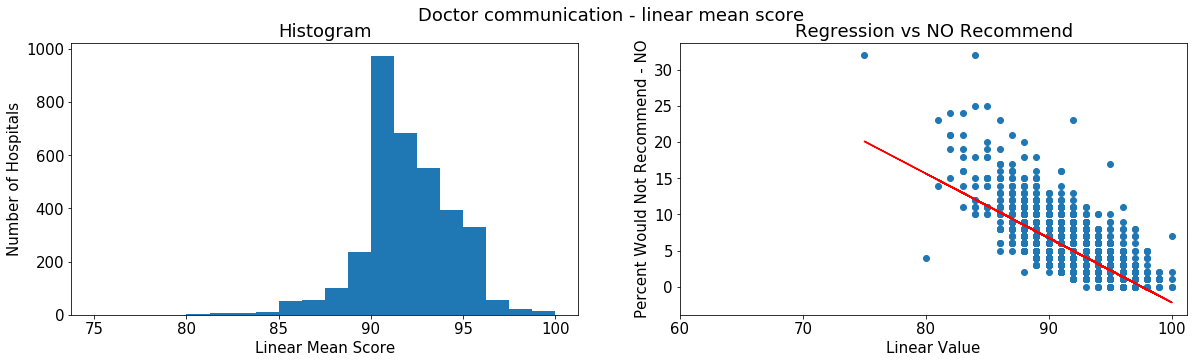

slope: -0.891632149034 intercept: 86.9878669839 r_value: -0.694642583696 p_value: 0.0 std_err: 0.0156008241285 r-squared: 0.482528319084


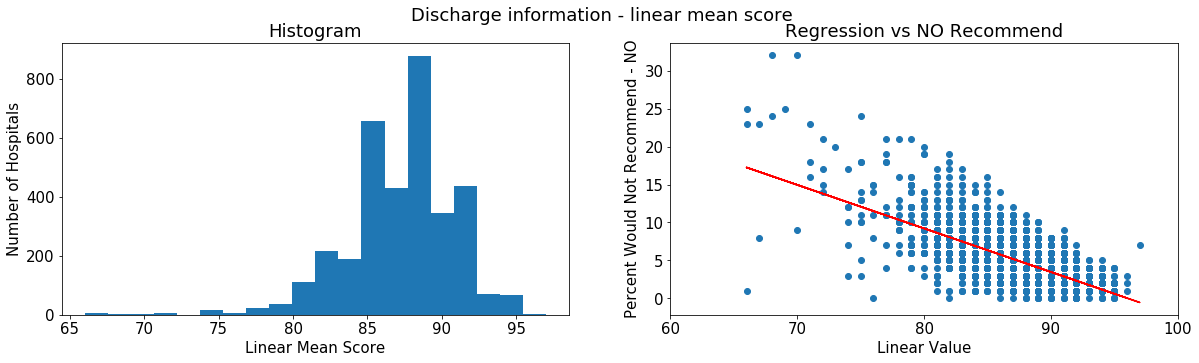

slope: -0.573593947978 intercept: 55.1033196562 r_value: -0.659894125803 p_value: 0.0 std_err: 0.0110346227422 r-squared: 0.435460257269


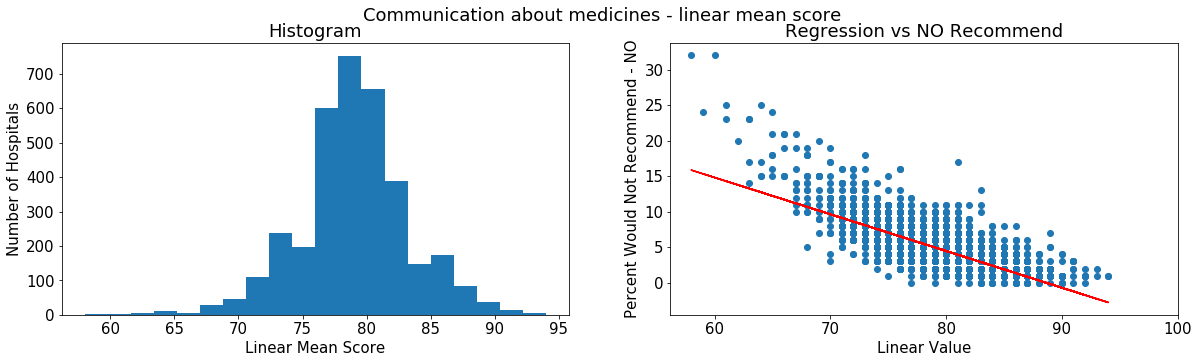

slope: -0.517283839095 intercept: 45.8612965678 r_value: -0.71012199773 p_value: 0.0 std_err: 0.00866556835133 r-squared: 0.50427325166


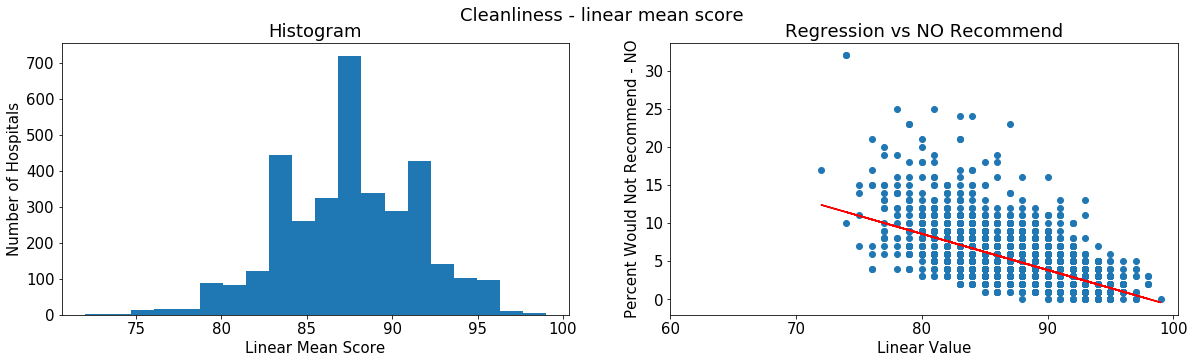

slope: -0.473977422439 intercept: 46.5122618316 r_value: -0.591479726126 p_value: 0.0 std_err: 0.0109170446251 r-squared: 0.349848266418


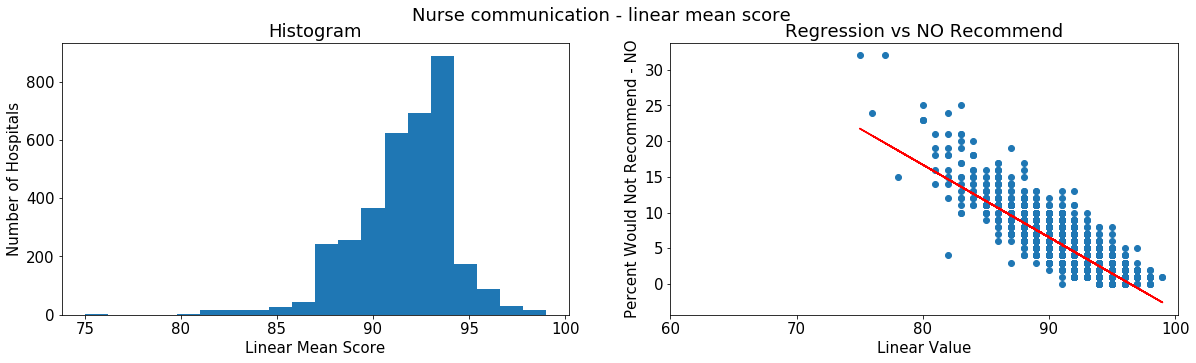

slope: -1.01484018458 intercept: 97.8856387618 r_value: -0.823905189251 p_value: 0.0 std_err: 0.0117943702566 r-squared: 0.678819760874


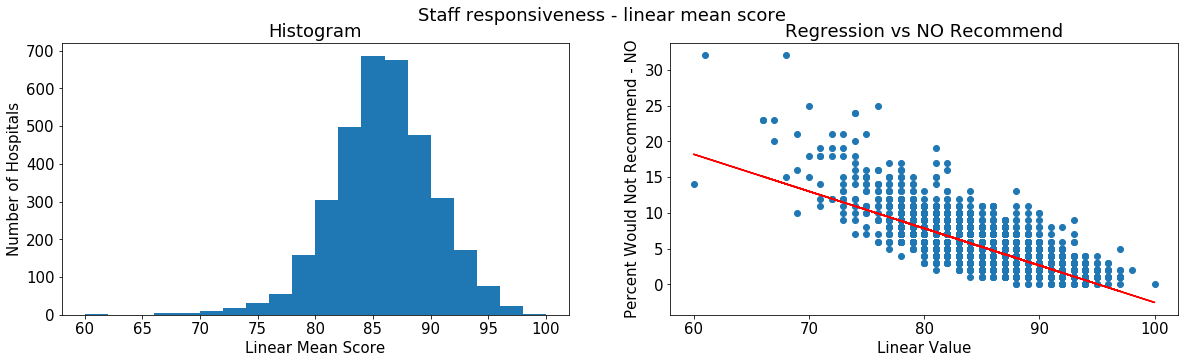

slope: -0.517787435525 intercept: 49.2670146012 r_value: -0.726274731132 p_value: 0.0 std_err: 0.00828023966151 r-squared: 0.52747498508


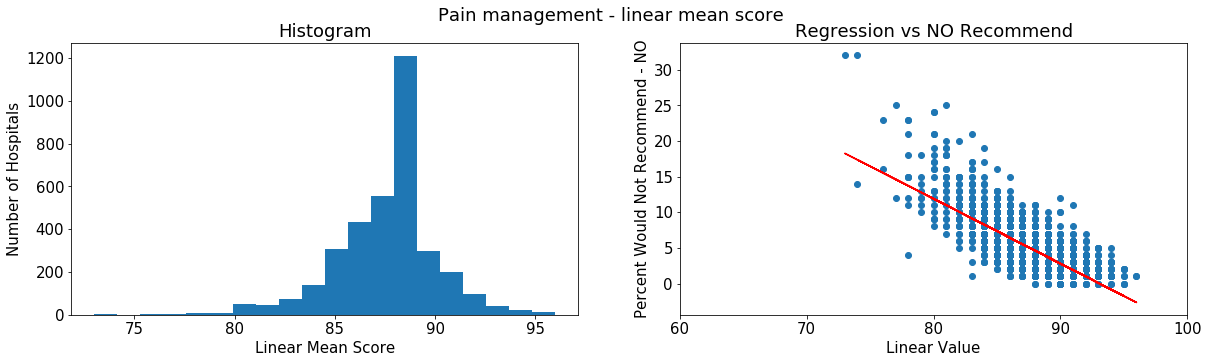

slope: -0.909527026549 intercept: 84.6586879329 r_value: -0.744373258469 p_value: 0.0 std_err: 0.0137856621029 r-squared: 0.554091547923


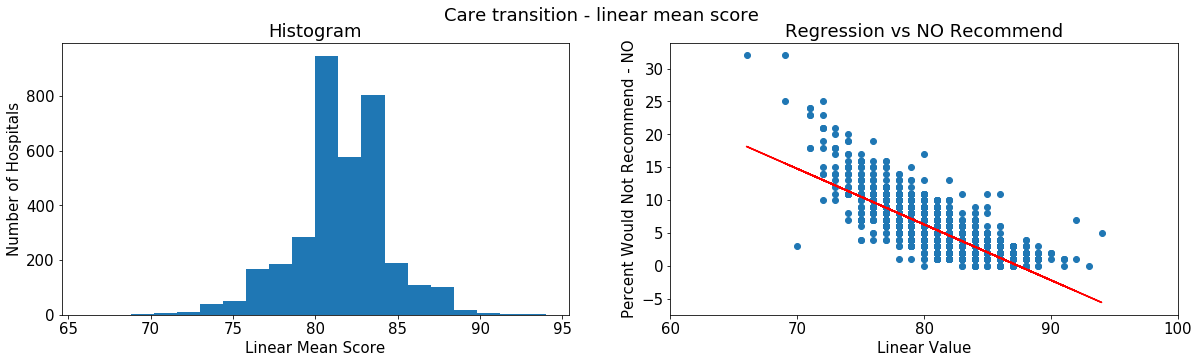

slope: -0.847154077293 intercept: 74.0727368612 r_value: -0.784036242379 p_value: 0.0 std_err: 0.011331788815 r-squared: 0.614712829363


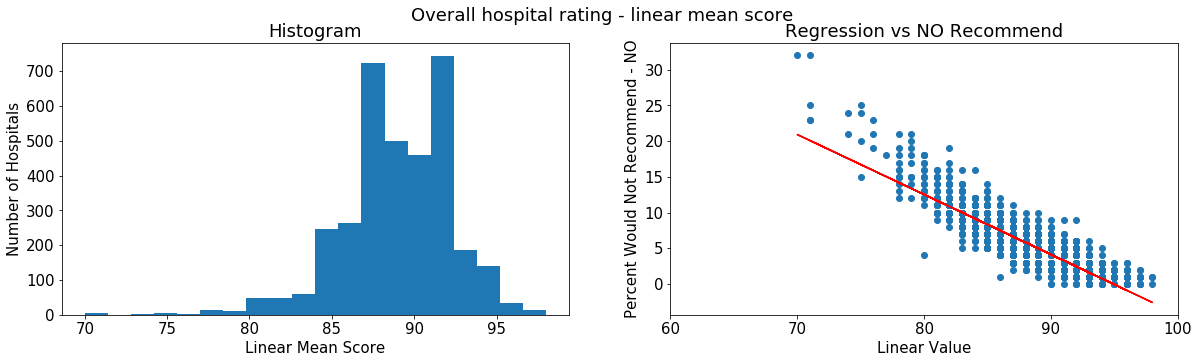

slope: -0.839799438853 intercept: 79.7119954189 r_value: -0.875708653226 p_value: 0.0 std_err: 0.00782346255399 r-squared: 0.766865645334


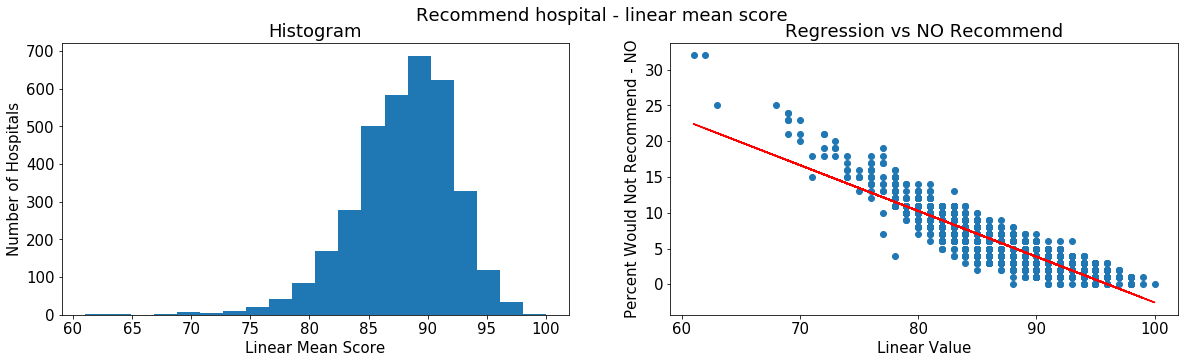

slope: -0.640029563046 intercept: 61.46223474 r_value: -0.898235799677 p_value: 0.0 std_err: 0.00529129771413 r-squared: 0.806827551821


In [62]:
# Select all linear mean value questions and create all plots and regressions

unique_questions = df.HCAHPS_Question.unique()
relevant_questions = []
for i in unique_questions:
    if i.find('linear mean') != -1:
        relevant_questions.append(i)
for i in relevant_questions:
    plot_histogram_and_regression(i)


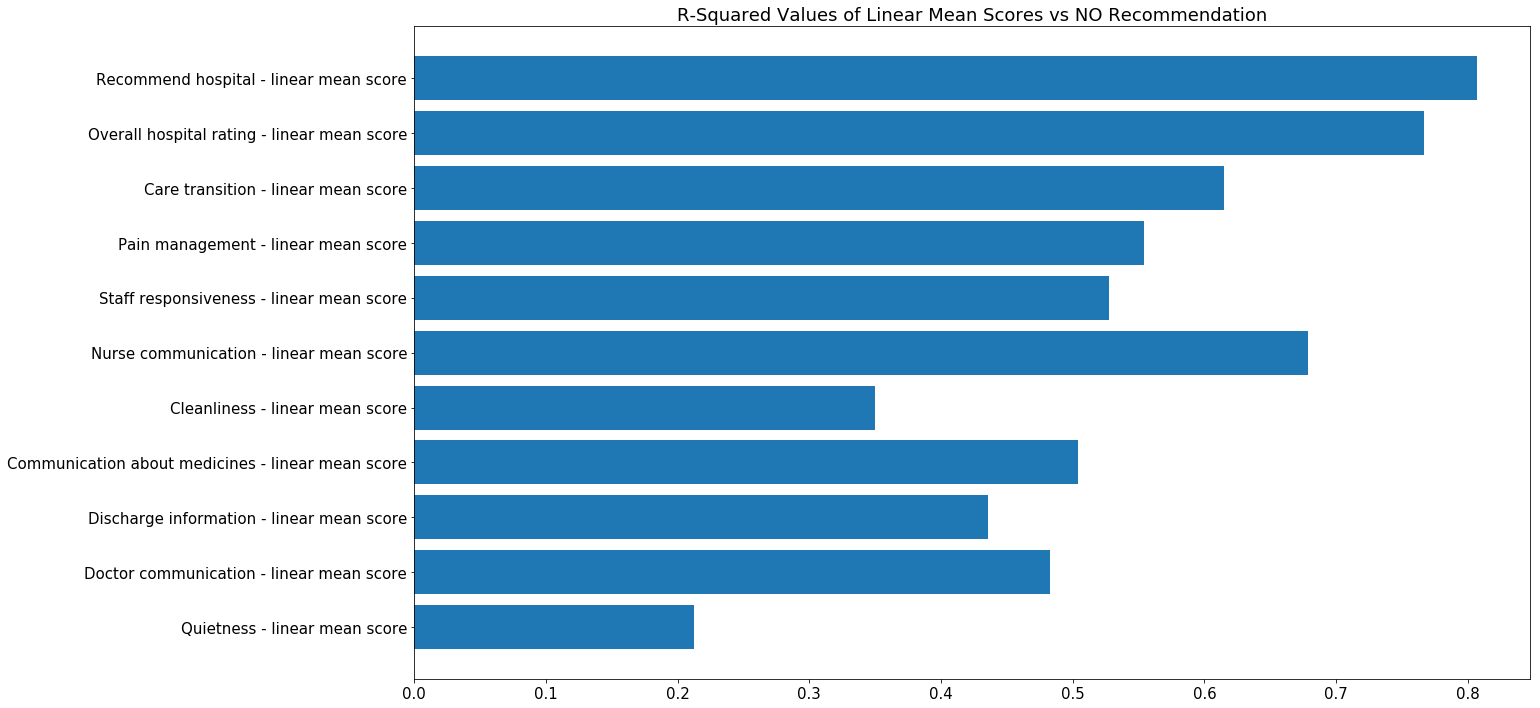

In [63]:
# Plot R Squared Values of all Linear Mean Scores

plt.figure(figsize=(20, 12))
y_pos = np.arange(len(r2_questions))
plt.barh(y_pos, r2_values)
plt.yticks(y_pos, r2_questions)
plt.title('R-Squared Values of Linear Mean Scores vs NO Recommendation')
plt.show()

In [64]:
# Function will plot histogram and least squared regression for a given question's value, and add r-squared
# values to lists


r2_questions = []
r2_values = []


def plot_histogram_and_regression_questions(question):
  question_frame = df[df.HCAHPS_Question == question]

  # remove bad fields
  question_frame = question_frame[question_frame.HCAHPS_Answer_Percent != 'Not Available']
  question_frame = question_frame[question_frame.HCAHPS_Answer_Percent != 'Not Applicable']

    
  # generate ineteger values
  answer_value = question_frame.HCAHPS_Answer_Percent
  answer_value_int = answer_value.astype(int)

  # Print Question for title
 

  # plot histogram  
  plt.figure(figsize=(20, 5))
  plt.suptitle(question)
  plt.subplot(1,2,1)
  plt.hist(answer_value_int, bins = 20)
  plt.xlabel('Answer Percent')
  plt.ylabel('Number of Hospitals')
  plt.title('Histogram')

  # Regression

  # merge questions and 'NO' reponses
  question_and_no_pd = pd.merge(question_frame, no_rec_df, on='Provider_ID')
  x_answer_percent = question_and_no_pd.HCAHPS_Answer_Percent_x
  x_answer_percent_int = x_answer_percent.astype(int)
  y_no_recommend = question_and_no_pd.HCAHPS_Answer_Percent_y
  y_no_recommend_int = y_no_recommend.astype(int)

  # create regression variables
  slope, intercept, r_value, p_value, std_err = stats.linregress(x_answer_percent_int, y_no_recommend_int)

  # plot regression
  plt.subplot(1,2,2)
  plt.scatter(x = x_answer_percent_int, y = y_no_recommend_int)
  plt.plot(x_answer_percent_int, intercept + slope*x_answer_percent_int, 'r', label='Least Squares Fitted Line')
  plt.xlabel('Answer Percent')
  plt.ylabel('Percent Would Not Recommend - NO')
  plt.title('Regression')
  plt.show()

  print('slope:', slope, 'intercept:', intercept, 'r_value:', r_value, 'p_value:', p_value, 'std_err:', std_err, 'r-squared:', r_value**2)
  r2_questions.append(question)
  r2_values.append(r_value**2)

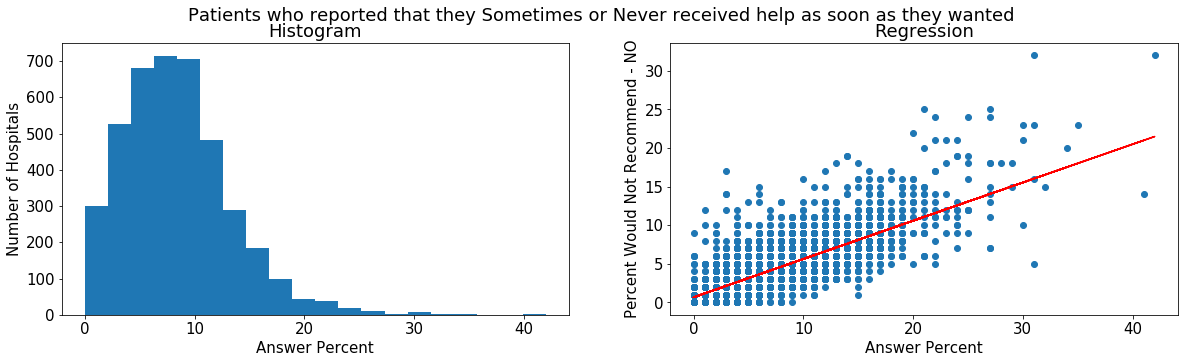

slope: 0.49584723606 intercept: 0.66066671162 r_value: 0.724008627968 p_value: 0.0 std_err: 0.0073769483142 r-squared: 0.524188493372


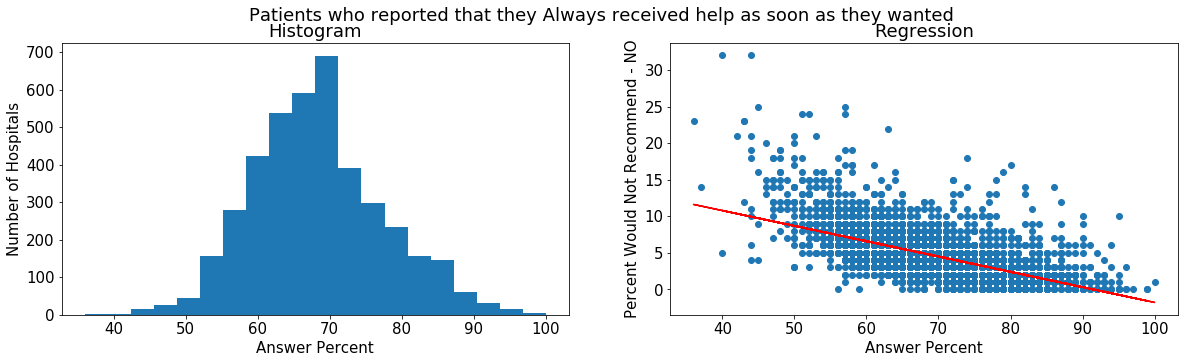

slope: -0.209516056911 intercept: 19.1553411715 r_value: -0.583367883334 p_value: 0.0 std_err: 0.00455509249293 r-squared: 0.340318087306


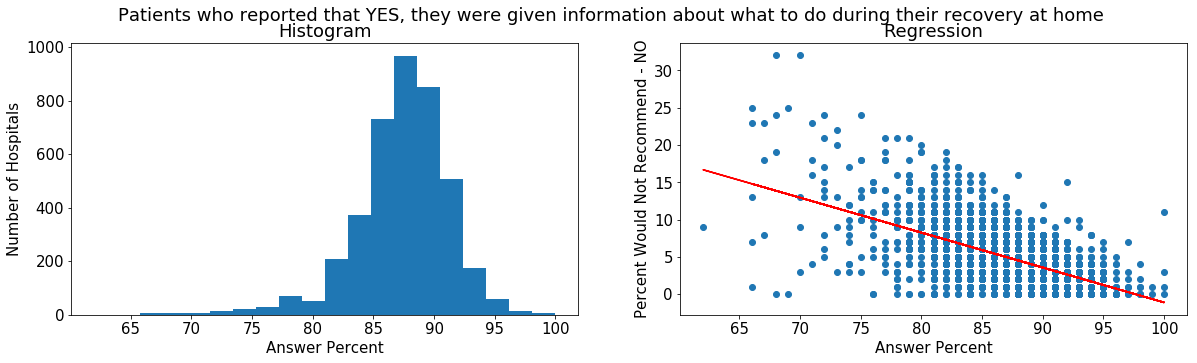

slope: -0.467887177215 intercept: 45.6945453538 r_value: -0.581088938418 p_value: 0.0 std_err: 0.0102327582629 r-squared: 0.337664354352


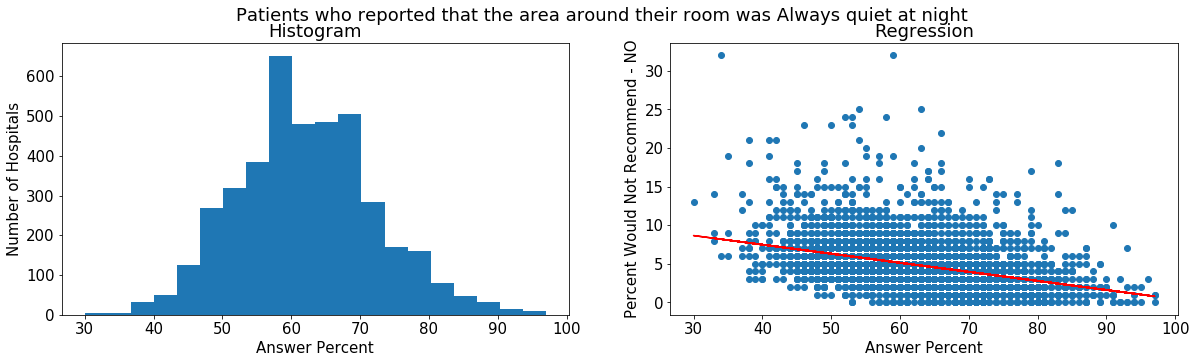

slope: -0.117484387838 intercept: 12.1801865316 r_value: -0.362929366322 p_value: 5.74380770011e-128 std_err: 0.00471024645062 r-squared: 0.131717724939


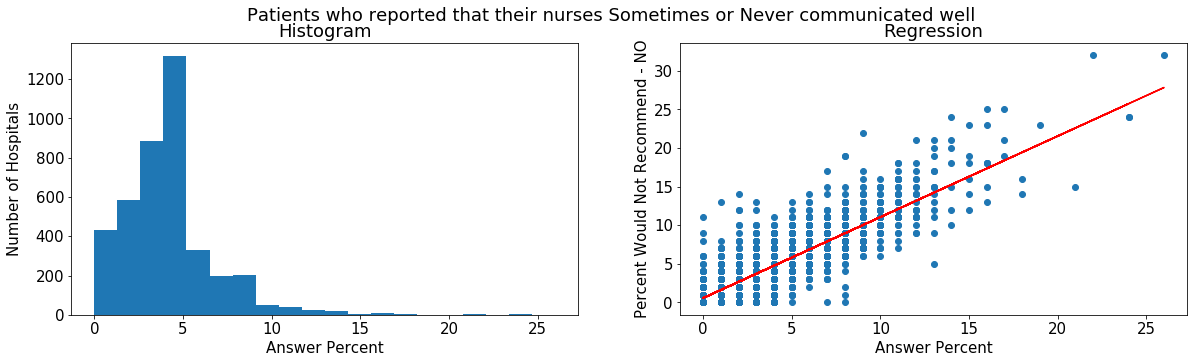

slope: 1.04947557922 intercept: 0.556994145415 r_value: 0.825906126404 p_value: 0.0 std_err: 0.0111873630532 r-squared: 0.682120929631


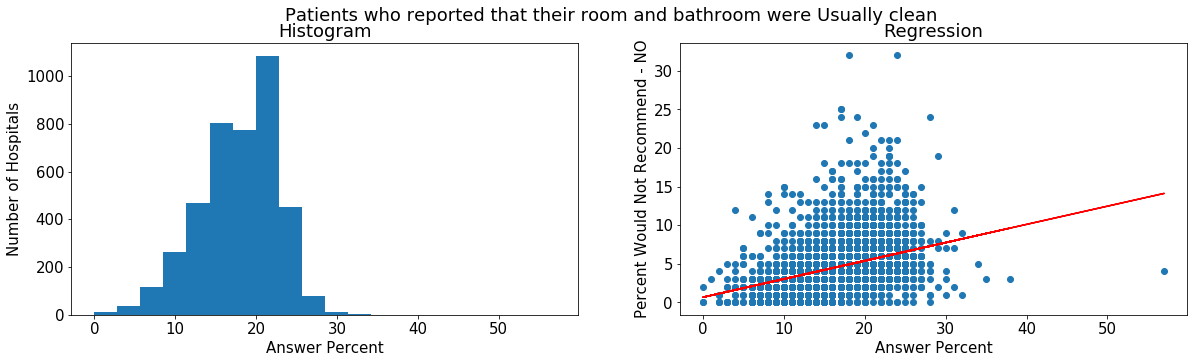

slope: 0.235955283017 intercept: 0.669245919224 r_value: 0.340408982123 p_value: 7.68506559066e-112 std_err: 0.0101774702401 r-squared: 0.11587827511


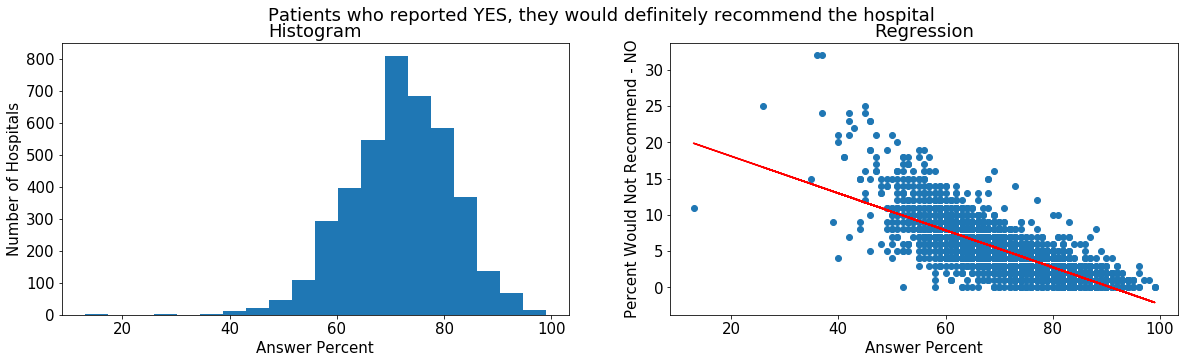

slope: -0.25538224537 intercept: 23.2117017917 r_value: -0.749197395268 p_value: 0.0 std_err: 0.00352561584946 r-squared: 0.561296737077


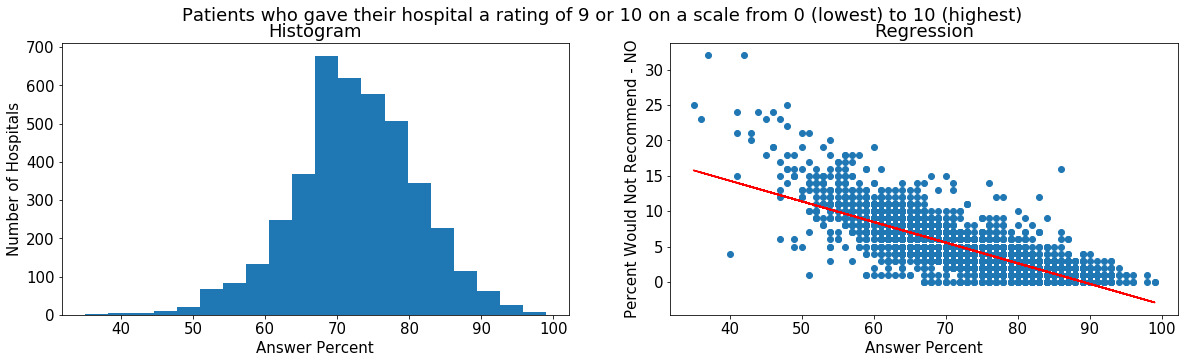

slope: -0.291593168442 intercept: 25.9746346279 r_value: -0.76547456108 p_value: 0.0 std_err: 0.00382760760382 r-squared: 0.585951303661


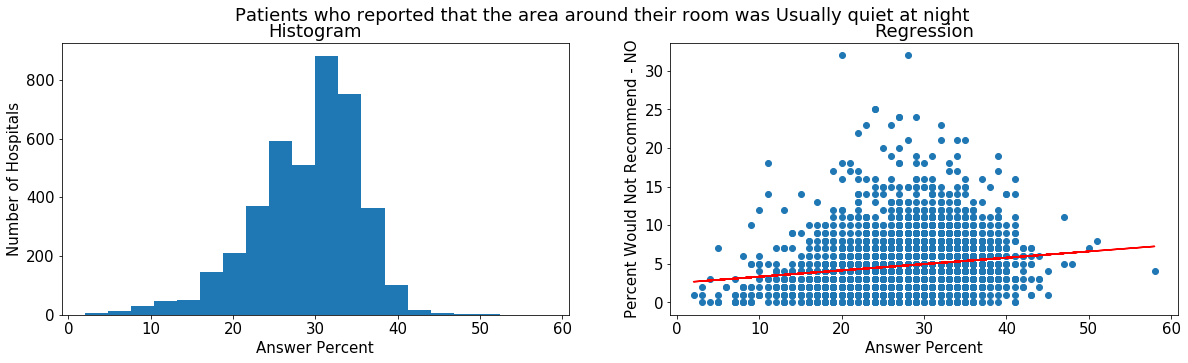

slope: 0.0817846048423 intercept: 2.51105505977 r_value: 0.160068196421 p_value: 5.93009673953e-25 std_err: 0.00787563167064 r-squared: 0.0256218275055


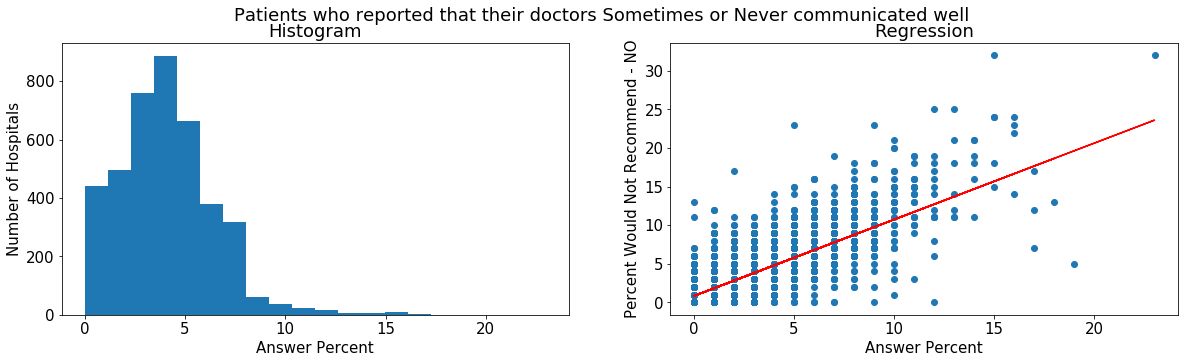

slope: 0.991345394428 intercept: 0.814849655561 r_value: 0.704909800013 p_value: 0.0 std_err: 0.0155766713612 r-squared: 0.496897826154


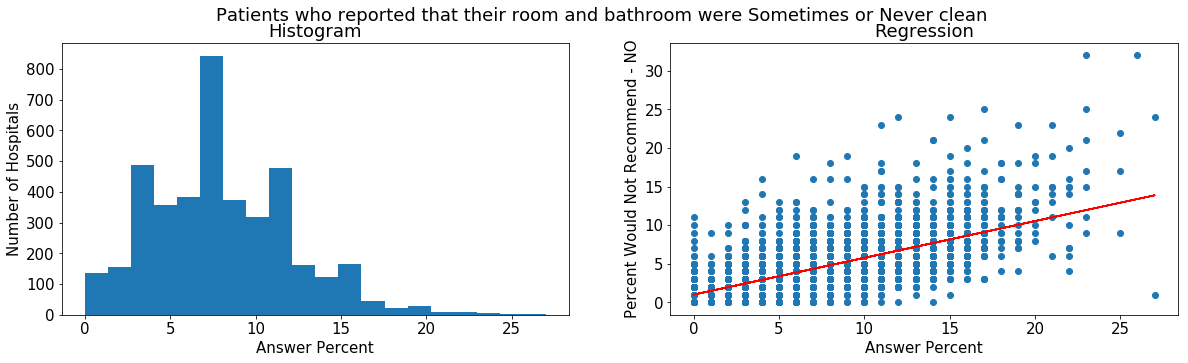

slope: 0.476588247185 intercept: 1.0035839668 r_value: 0.602559623404 p_value: 0.0 std_err: 0.00985692626527 r-squared: 0.363078099756


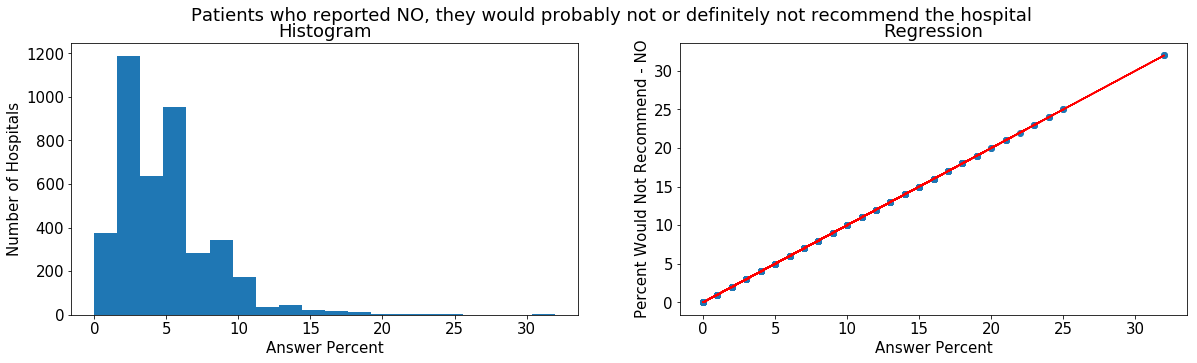

slope: 1.0 intercept: 0.0 r_value: 1.0 p_value: 0.0 std_err: 0.0 r-squared: 1.0


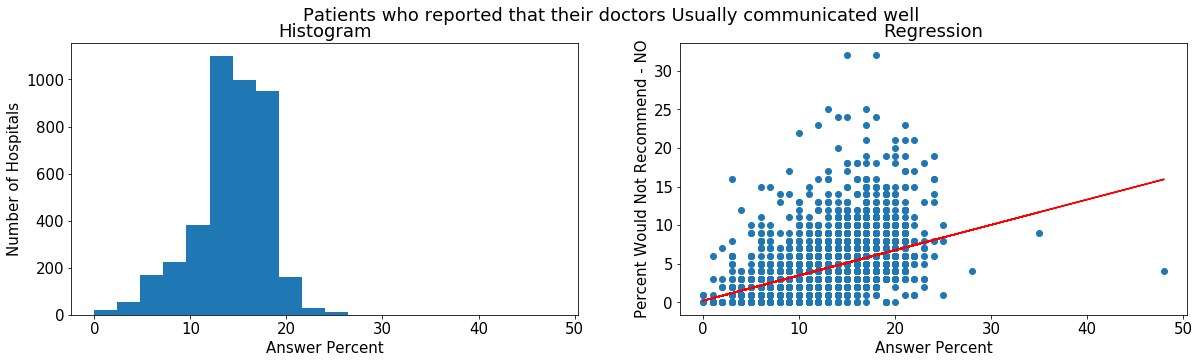

slope: 0.327781556846 intercept: 0.215996905653 r_value: 0.386717631363 p_value: 1.78549358672e-146 std_err: 0.0122059030001 r-squared: 0.149550526407


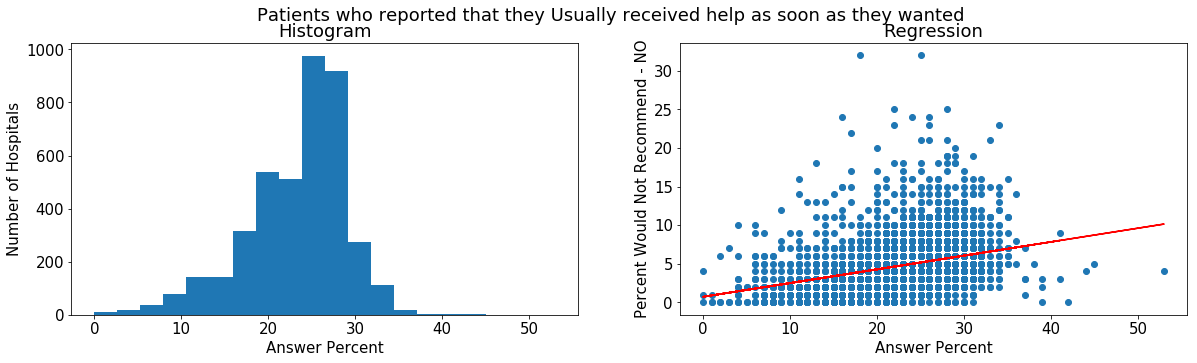

slope: 0.177828759445 intercept: 0.722605995481 r_value: 0.317577196027 p_value: 8.32293915684e-97 std_err: 0.00829129952753 r-squared: 0.100855275437


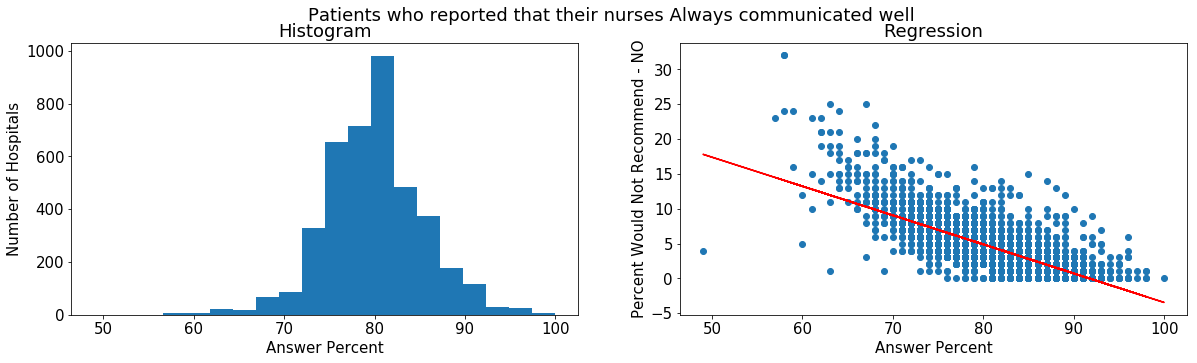

slope: -0.416872185567 intercept: 38.2345199156 r_value: -0.697543637243 p_value: 0.0 std_err: 0.00668695636288 r-squared: 0.486567125859


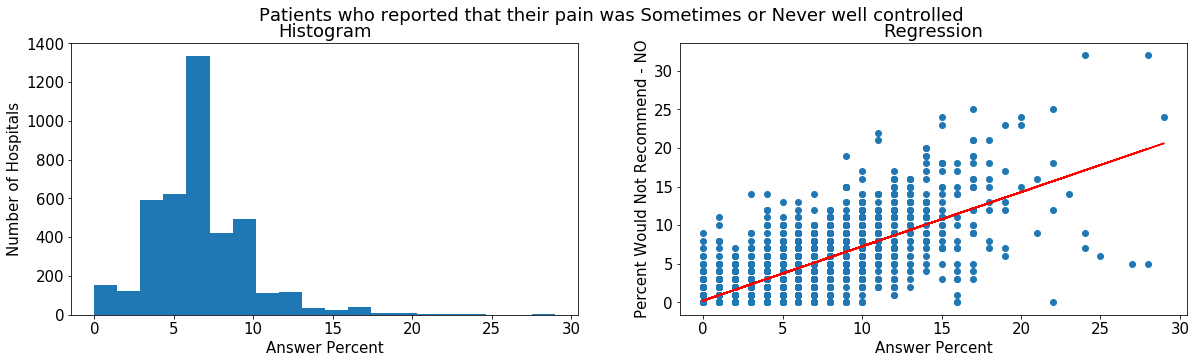

slope: 0.703488249741 intercept: 0.218357768836 r_value: 0.686145381179 p_value: 0.0 std_err: 0.0116468260666 r-squared: 0.470795484113


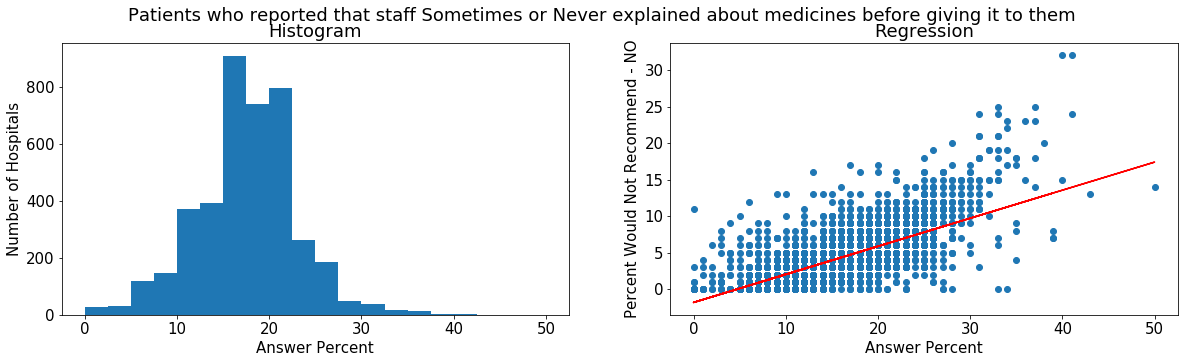

slope: 0.384173836556 intercept: -1.80825409284 r_value: 0.642438515842 p_value: 0.0 std_err: 0.007156015227 r-squared: 0.412727246637


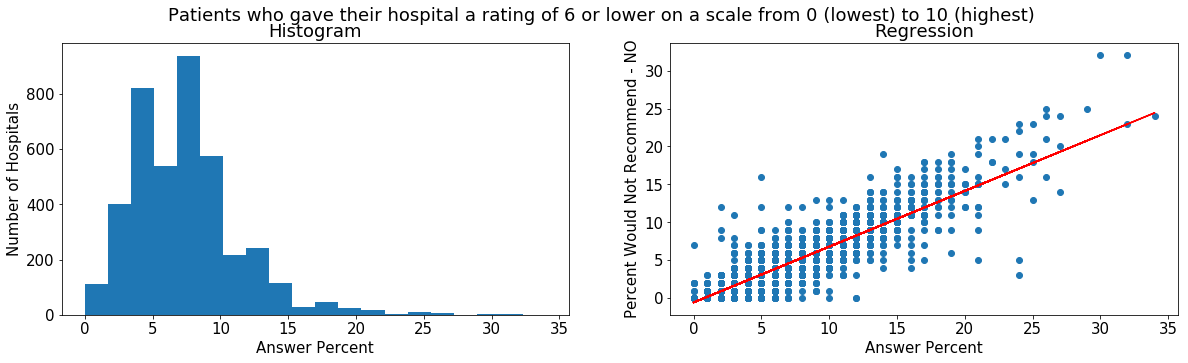

slope: 0.734865975098 intercept: -0.557688740204 r_value: 0.875985911775 p_value: 0.0 std_err: 0.00631853553127 r-squared: 0.767351317628


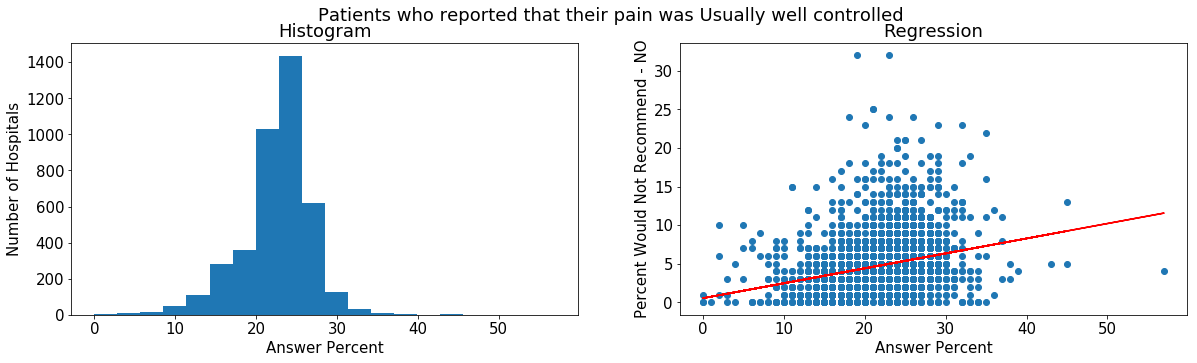

slope: 0.193449213083 intercept: 0.544261097219 r_value: 0.257666296291 p_value: 3.20221675292e-63 std_err: 0.0113278311954 r-squared: 0.0663919202445


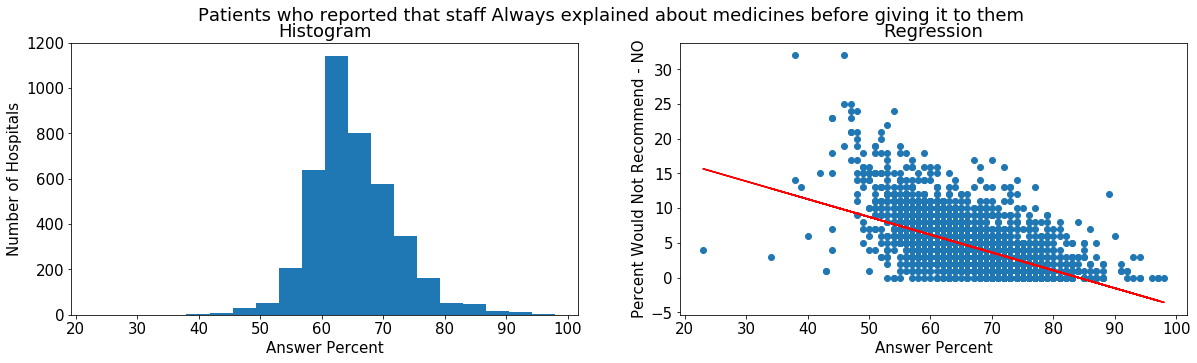

slope: -0.256725471153 intercept: 21.5789100786 r_value: -0.544210625438 p_value: 0.0 std_err: 0.00618005620082 r-squared: 0.29616520484


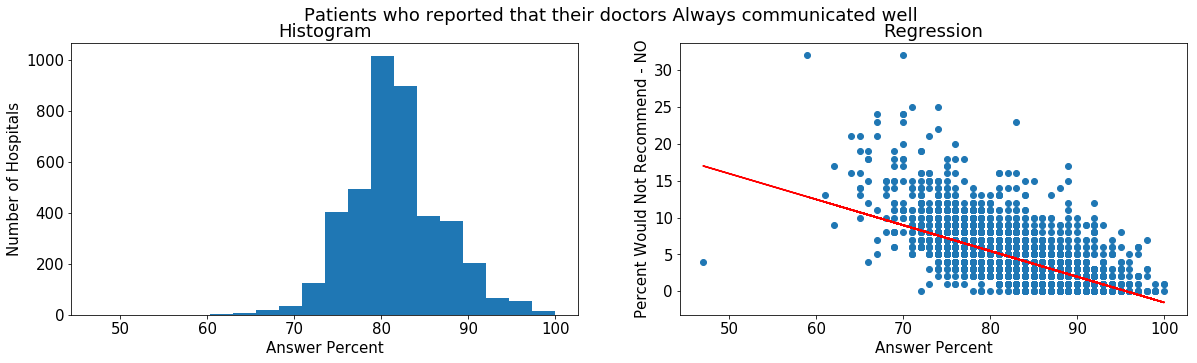

slope: -0.349706471545 intercept: 33.4439925982 r_value: -0.578652912482 p_value: 0.0 std_err: 0.00769668950738 r-squared: 0.334839193123


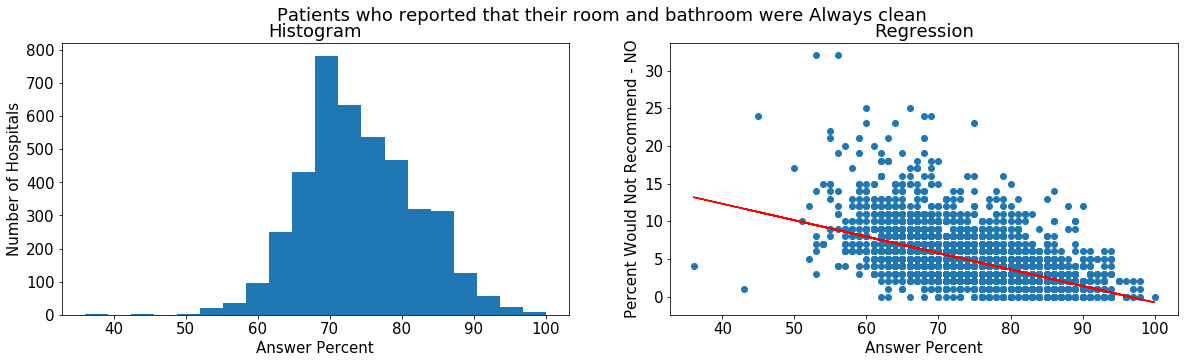

slope: -0.218288988122 intercept: 21.0409650344 r_value: -0.522973130119 p_value: 6.90633713393e-287 std_err: 0.00555552503654 r-squared: 0.273500894826


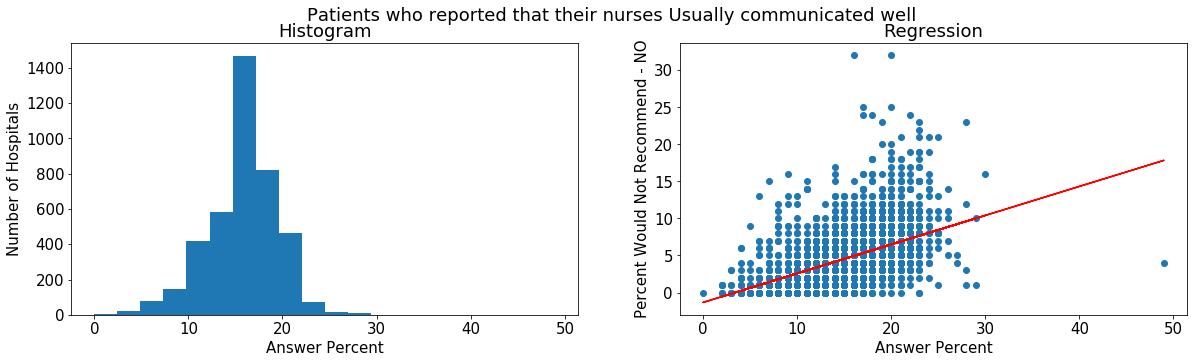

slope: 0.391530622565 intercept: -1.33681207829 r_value: 0.450009076815 p_value: 8.54068790118e-204 std_err: 0.01213284636 r-squared: 0.202508169216


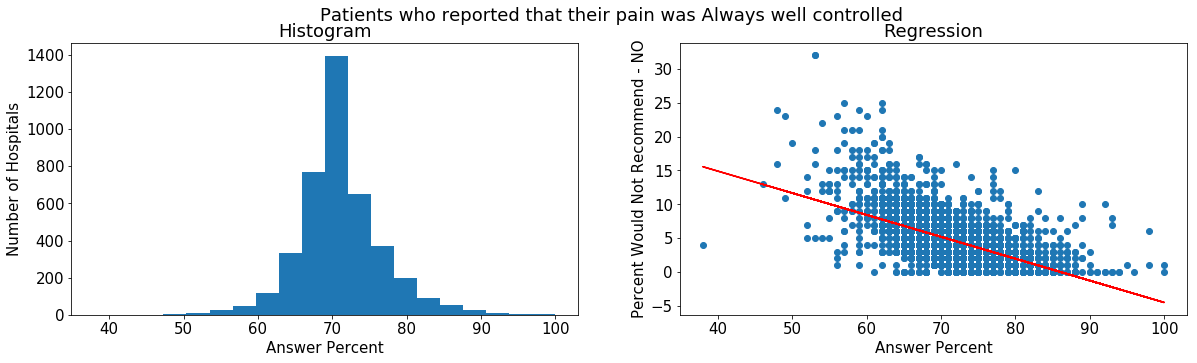

slope: -0.32337527371 intercept: 27.8359452535 r_value: -0.572184497586 p_value: 0.0 std_err: 0.00723778788435 r-squared: 0.327395099278


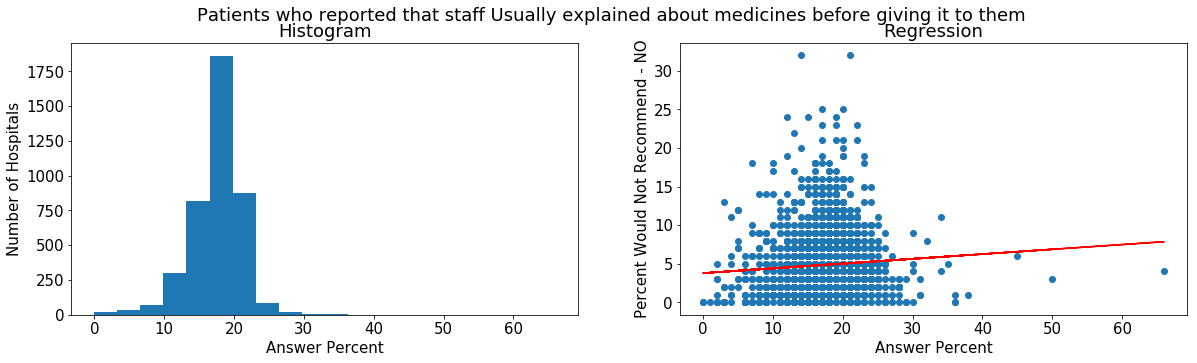

slope: 0.0616733231828 intercept: 3.79063476406 r_value: 0.0699343433123 p_value: 7.33438957351e-06 std_err: 0.0137371718928 r-squared: 0.00489081237453


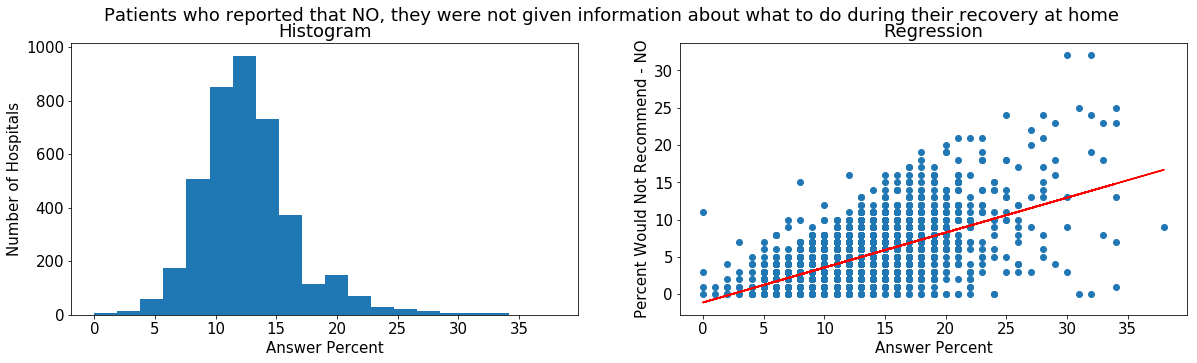

slope: 0.467887177215 intercept: -1.09417236771 r_value: 0.581088938418 p_value: 0.0 std_err: 0.0102327582629 r-squared: 0.337664354352


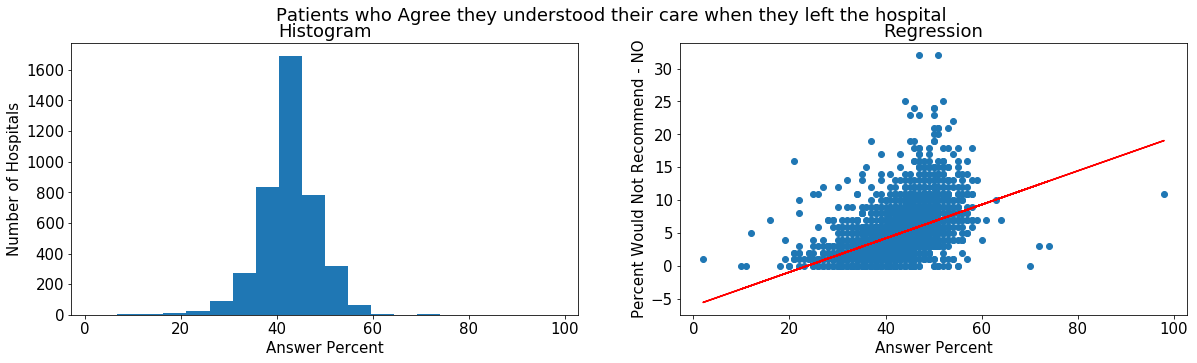

slope: 0.256269262659 intercept: -6.05009741454 r_value: 0.463722893331 p_value: 6.52981651626e-218 std_err: 0.0076456983456 r-squared: 0.2150389218


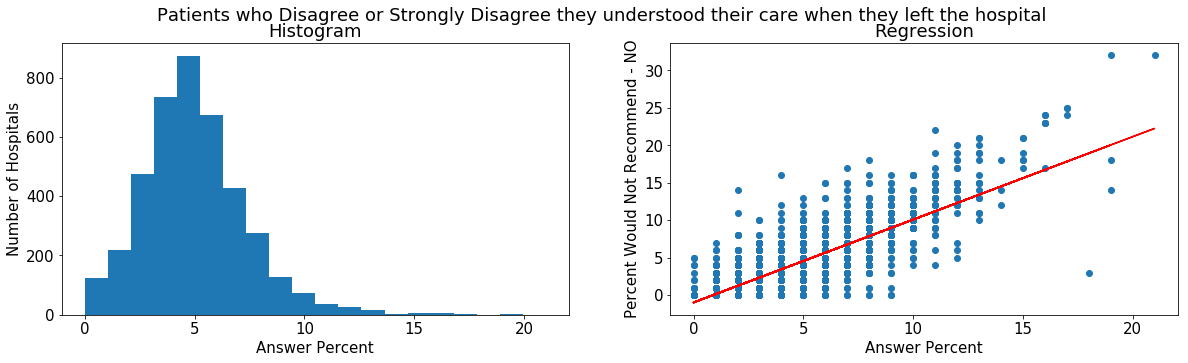

slope: 1.10594802681 intercept: -0.973064333768 r_value: 0.783379847781 p_value: 0.0 std_err: 0.0137021524116 r-squared: 0.61368398591


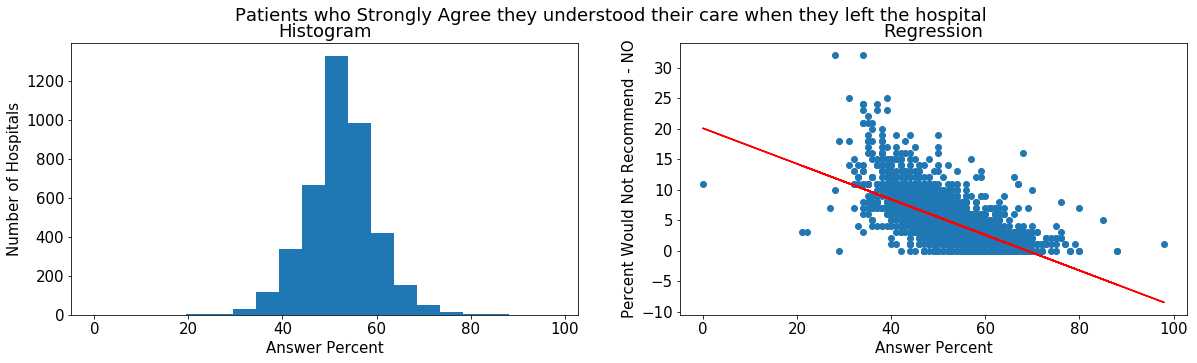

slope: -0.291345246334 intercept: 20.0496907197 r_value: -0.63728909306 p_value: 0.0 std_err: 0.00550135357279 r-squared: 0.406137388133


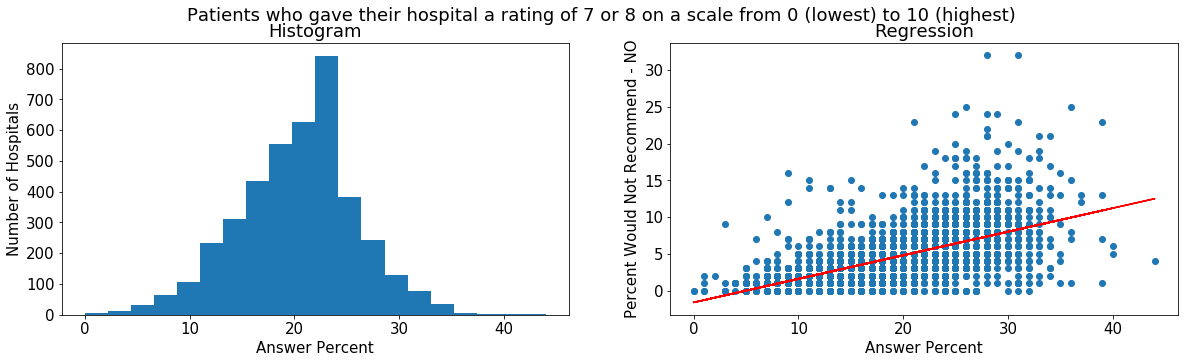

slope: 0.320863908501 intercept: -1.62265357081 r_value: 0.556527071128 p_value: 0.0 std_err: 0.00747999980342 r-squared: 0.309722380898


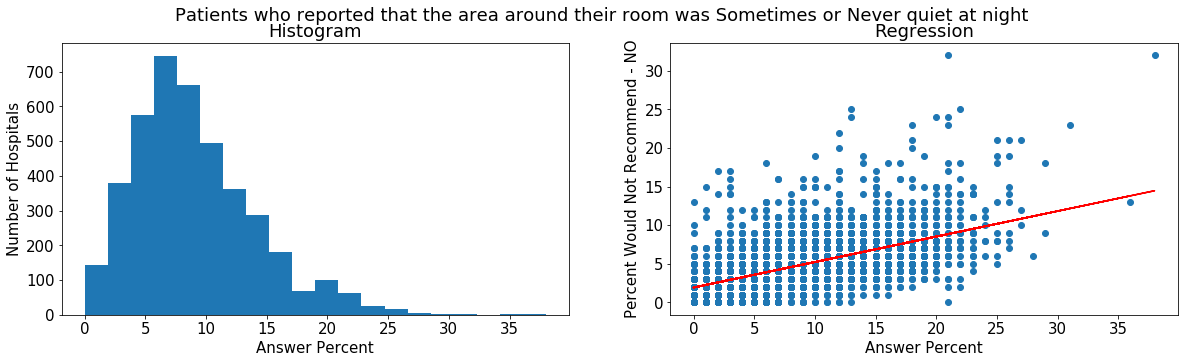

slope: 0.329988468102 intercept: 1.92643732775 r_value: 0.51632032344 p_value: 1.90530103912e-278 std_err: 0.00854690852848 r-squared: 0.266586676397


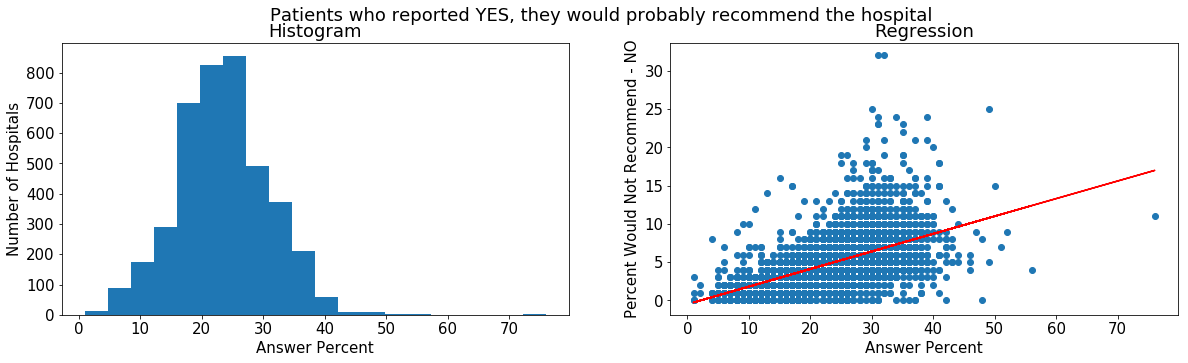

slope: 0.229897185569 intercept: -0.488095165269 r_value: 0.524773024201 p_value: 3.33546511815e-289 std_err: 0.00582331670671 r-squared: 0.275386726929


In [65]:
# Remove star ratings and linear mean value questions, and send all other questions to histogram-regression 
# function

unique_questions = df.HCAHPS_Question.unique()
relevant_questions = []
for i in unique_questions:
    if i.find('star rating') == -1:
        if i.find('linear mean') == -1:
            relevant_questions.append(i)
for i in relevant_questions:
    plot_histogram_and_regression_questions(i)

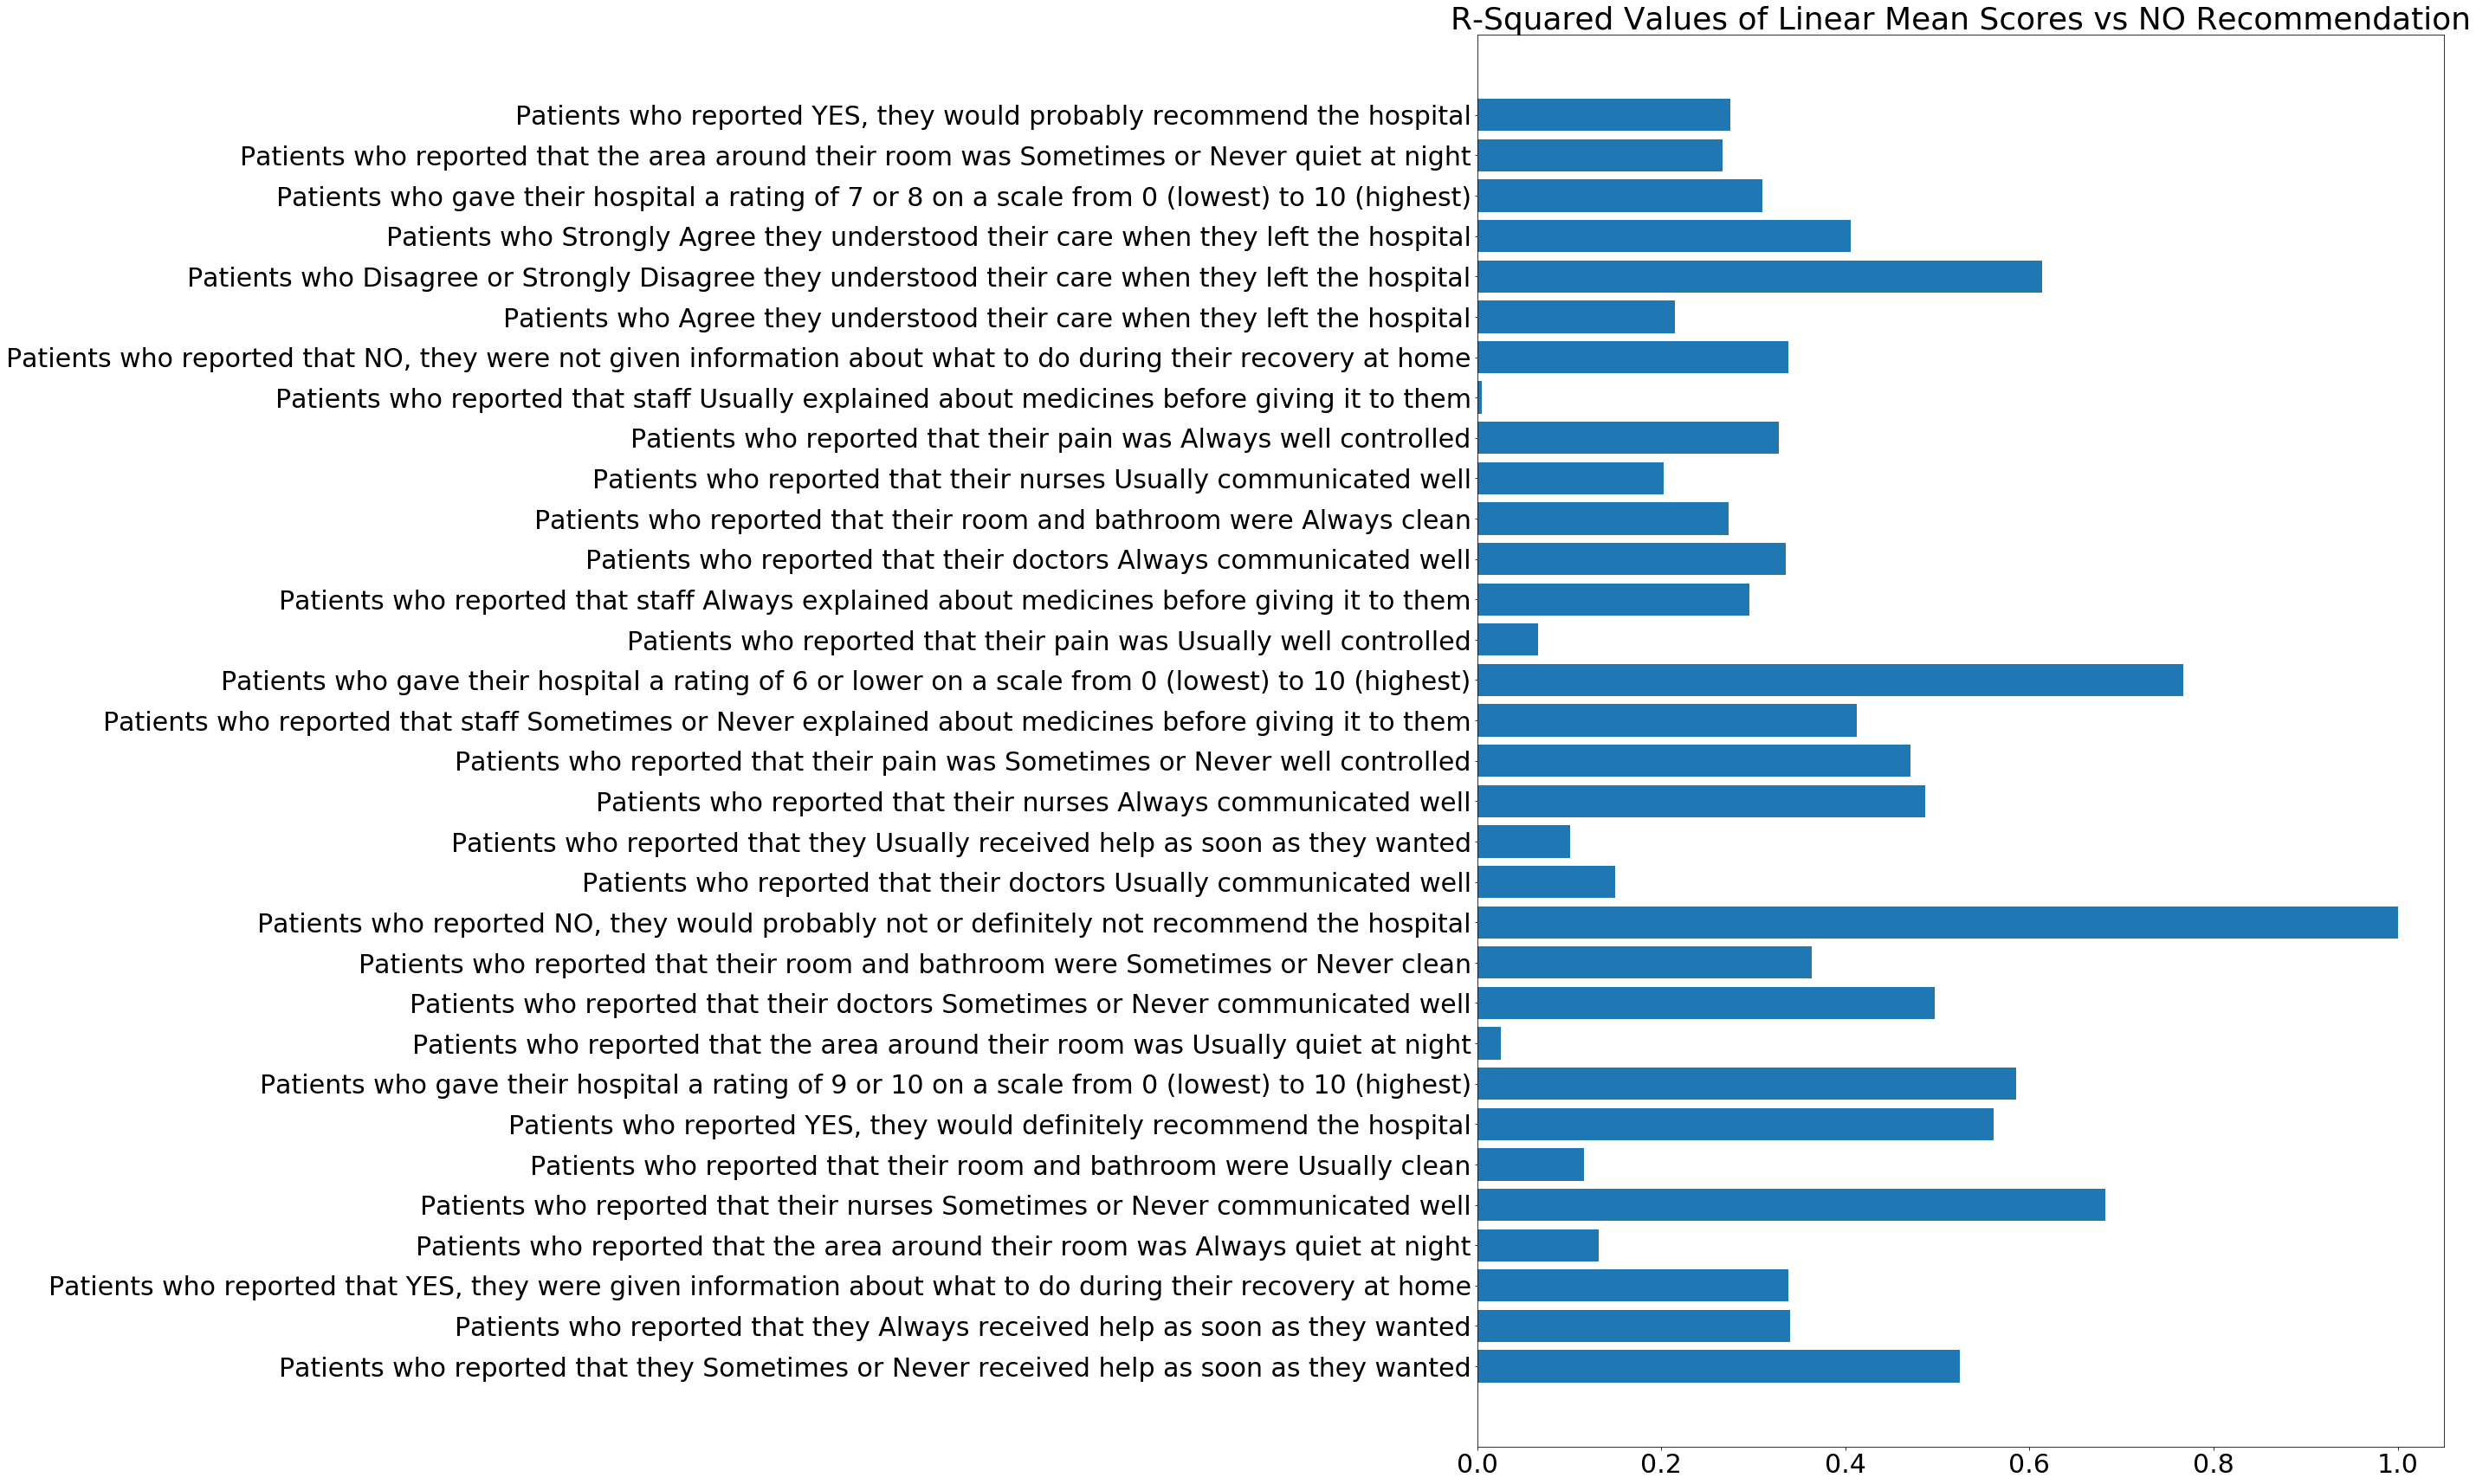

In [66]:
# Plot R Squared Values of all Linear Mean Scores for All Questions

plt.rcParams.update({'font.size': 30})

plt.figure(figsize=(20, 30))
y_pos = np.arange(len(r2_questions))
plt.barh(y_pos, r2_values)
plt.yticks(y_pos, r2_questions)
plt.title('R-Squared Values of Linear Mean Scores vs NO Recommendation')
plt.show()